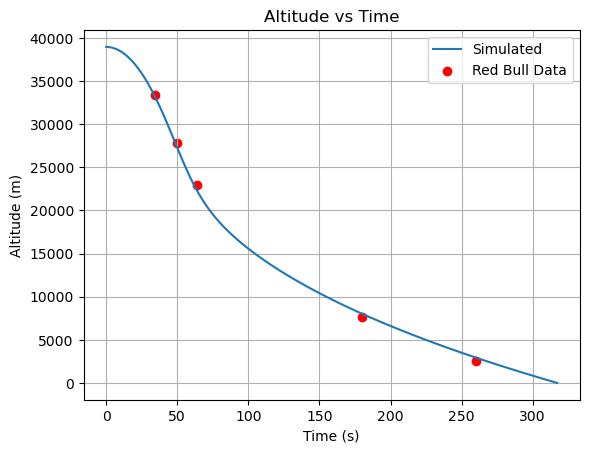

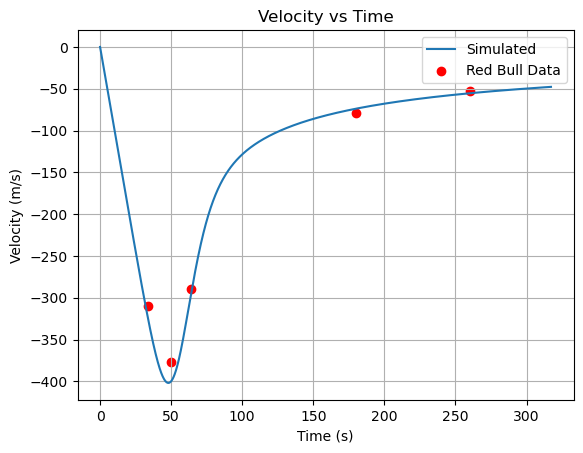

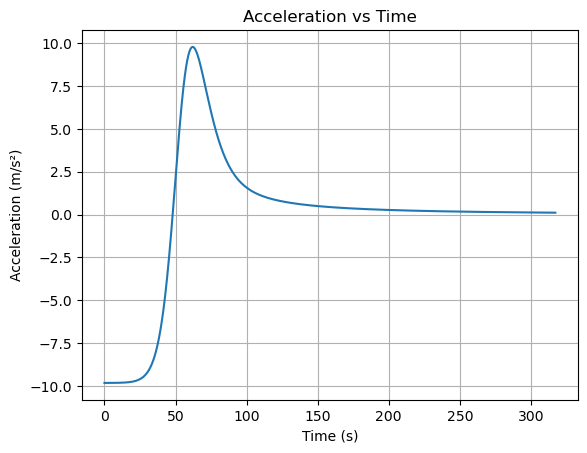

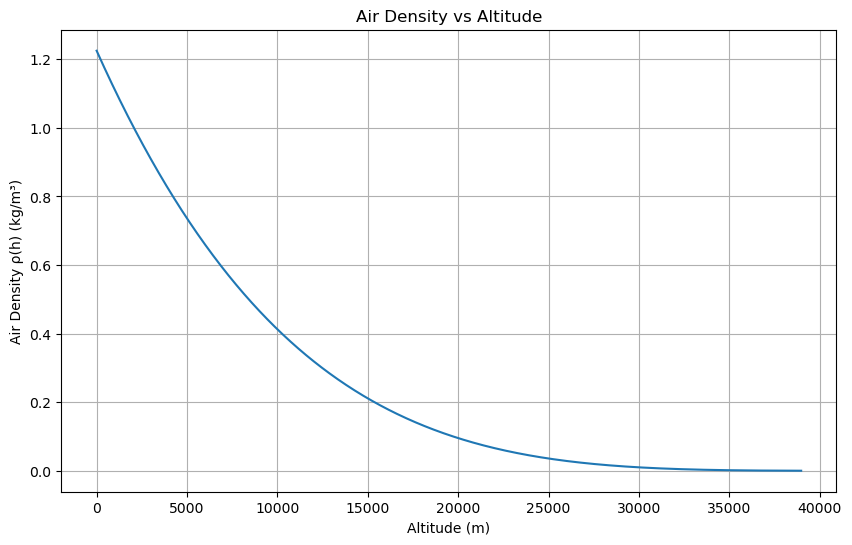

In [1]:
"""
-------------------------------------------------------------------------
Name:            Joshua Navarro
Date:            March 31, 2025
Project #:       2
Status:          Completed
Class:           PHYS 2425
-------------------------------------------------------------------------
Objective:  
This program models the skydive of Felix Baumgartner from the edge of 
space, simulating how air density changes with altitude and how it 
affects position, velocity, and acceleration during the fall.
-------------------------------------------------------------------------
"""

import numpy as np
import matplotlib.pyplot as plt

#Physical Constants
g = 9.81    # Gravity in m/s²
m = 117.93  # Felix's mass in kg (260 lb)
C = 0.93    # Drag coefficient (estimated for a falling human)
A = 0.90    # Cross-sectional area (m²), affects air resistance

#Atmospheric Constants
# Used to calculate how air pressure and temperature change with height
M = 0.0289644  # kg/mol, molar mass of air
R = 8.31447    # J/(mol·K), ideal gas constant
P0 = 101325    # Pa, air pressure at sea level
L = 0.0065     # K/m, rate at which temperature decreases with height
T0 = 288.15    # K, temperature at sea level

#Air Density Function
def rho(h):
    """
    Returns air density at a given altitude h (in meters).
    As Felix falls, air gets thicker, so air resistance increases.
    """
    if h < 0:
        h = 0  # Just in case he goes below ground level
    T = T0 - L * h  # Temperature at altitude
    p = P0 * (1 - (L * h / T0)) ** (g * M / (R * L))  # Pressure at altitude
    return (p * M) / (R * T)  # Density using the ideal gas law

#Net Force Function
def Fnet(v, y):
    """
    Calculates the net force acting on Felix.
    Drag force is always in the opposite direction of motion.
    """
    drag = 0.5 * C * A * rho(y) * v**2

    # If he's falling down, drag pushes up (negative)
    if v > 0:
        drag = -drag

    return -m * g + drag

#Initial Conditions
y = 38969  # Starting height (m)
v = 0      # Starting velocity (m/s)
t = 0      # Starting time (s)
dt = 0.1   # Time step for the simulation

#Lists to Save Data for Plotting
yValues = []  # Altitude
vValues = []  # Velocity
tValues = []  # Time
aValues = []  # Acceleration

# Loop until Felix opens his parachute
while y > 0:
    yValues.append(y)
    vValues.append(v)
    tValues.append(t)

    F = Fnet(v, y) # Net force at current speed and altitude
    a = F / m         
    aValues.append(a)

    v = v + a * dt  # Update velocity
    y = y + v * dt  # Update altitude
    t = t + dt # Move forward in time by a split second

# Real Data from the Red Bull Stratos Jump
# Times, altitudes, and speeds from the official factsheet
real_times = [34, 50, 64, 180, 260]
real_altitudes = [33446, 27833, 22961, 7619, 2567]
real_speeds = [-309.7, -377.1, -289.7, -79.2, -53.2]  # Negative because he's falling

#Plot 1: Altitude vs Time
plt.figure()
plt.plot(tValues, yValues, label="Simulated")
plt.scatter(real_times, real_altitudes, color='red', label="Red Bull Data")
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.title("Altitude vs Time")
plt.legend()
plt.grid()
plt.show()

#Plot 2: Velocity vs Time
# Starts at zero, gets more negative as he falls
# Peaks around 50 seconds, then slows down due to drag
plt.figure()
plt.plot(tValues, vValues, label="Simulated")
plt.scatter(real_times, real_speeds, color='red', label="Red Bull Data")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity vs Time")
plt.legend()
plt.grid()
plt.show()

#Plot 3: Acceleration vs Time
# Starts near -9.8 m/s², then moves toward zero as drag builds up
plt.figure()
plt.plot(tValues, aValues)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.title("Acceleration vs Time")
plt.grid()
plt.show()

# === Bonus Plot: Air Density vs Altitude ===
# Shows how thin the air is where Felix starts, and how it increases as he falls
h = np.linspace(0, 38969, 1000)
rho_values = [rho(alt) for alt in h]

plt.figure(figsize=(10,6))
plt.plot(h, rho_values)
plt.xlabel('Altitude (m)')
plt.ylabel('Air Density ρ(h) (kg/m³)')
plt.title('Air Density vs Altitude')
plt.grid(True)
plt.show()
